In [3]:
import ROOT
import aa
import root_numpy as rnp
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import Range1d
TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,tap,previewsave,box_select,poly_select,lasso_select"

loading root....  /usr/local
loading aalib...  /home/vagrant/Jpp_trunk/externals/aanet//libaa.so


/usr/local/lib/python2.7/dist-packages/root_numpy/__init__.py:35: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.11.1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [4]:
rootfile = "../../ROOT_files/km3_v4_numucc_1.evt.JEnergy.root"

In [5]:
mc_pos_x = rnp.root2array(rootfile, treename="MONTECARLO", branches="MONTECARLO.TrackList_.position().x[0]")
mc_pos_y = rnp.root2array(rootfile, treename="MONTECARLO", branches="MONTECARLO.TrackList_.position().y[0]")
mc_pos_z = rnp.root2array(rootfile, treename="MONTECARLO", branches="MONTECARLO.TrackList_.position().z[0]")
mc_dir_x = rnp.root2array(rootfile, treename="MONTECARLO", branches="MONTECARLO.TrackList_.direction().x[0]")
mc_dir_y = rnp.root2array(rootfile, treename="MONTECARLO", branches="MONTECARLO.TrackList_.direction().y[0]")
mc_dir_z = rnp.root2array(rootfile, treename="MONTECARLO", branches="MONTECARLO.TrackList_.direction().z[0]")
mc_len = rnp.root2array(rootfile, treename="MONTECARLO", branches= "MONTECARLO.TrackList_.length_[0]")

TClass::TClass:0: RuntimeWarning: no dictionary for class JFIT::JEvt is available
TClass::TClass:0: RuntimeWarning: no dictionary for class JFIT::JFit is available


In [6]:
trkl_type = rnp.root2array(rootfile, treename="MONTECARLO", branches="TrackList_.type_[0]")
trkl_E = rnp.root2array(rootfile, treename="MONTECARLO", branches="TrackList_.E_[0]")

In [7]:
np.all(trkl_type==5)

True

In [8]:
mc_pos_x[:10]

array([array([-409.379]), array([ 120.346]), array([ 390.302]),
       array([ 405.877]), array([ 99.271]), array([ 645.073]),
       array([-538.216]), array([-158.585]), array([-402.603]),
       array([-412.236])], dtype=object)

In [9]:
end_x = np.hstack(mc_pos_x + mc_dir_x * mc_len)
end_y = np.hstack(mc_pos_y + mc_dir_y * mc_len)
end_z = np.hstack(mc_pos_z + mc_dir_z * mc_len)

In [9]:
for j in range(10):
    for i in range(mc_pos_x[j].size):
        print([mc_pos_x[j][i], (mc_pos_x[j]+ mc_pos_x[j]*mc_dir_x[j])[i]], 
                    [mc_pos_y[j][i], (mc_pos_y[j]+ mc_pos_y[j]*mc_dir_y[j])[i]],#(,zs=
        [mc_pos_z[j][i], (mc_pos_z[j]+ mc_pos_z[j]*mc_dir_z[j])[i]])

([-409.37900000000002, -448.34533073600005], [43.789000000000001, 1.7376788870000013], [114.21599999999999, 84.272219711999995])
([120.346, 140.439930928], [695.84400000000005, 11.914240967999945], [17.738, 16.355801826])
([390.30200000000002, 715.00516225600006], [386.065, 177.720003905], [-37.645000000000003, -32.786235140000002])
([405.87700000000001, 456.65221270000001], [35.679000000000002, 18.310855269000001], [-154.91, -288.83201865000001])
([99.271000000000001, 32.348547330999992], [-143.81200000000001, -237.39938474400003], [388.13900000000001, 252.54302848899999])
([645.07299999999998, 469.37382191699999], [287.423, 39.723008292000003], [193.79499999999999, 110.86469323999999])
([-538.21600000000001, -1007.667909192], [-23.478999999999999, -20.891755073999999], [-405.93200000000002, -599.36143952400005])
([-158.58500000000001, -234.92972202000001], [196.83799999999999, 215.152988548], [-405.93200000000002, -759.71878714400009])
([-402.60300000000001, -125.47645878899999], [19

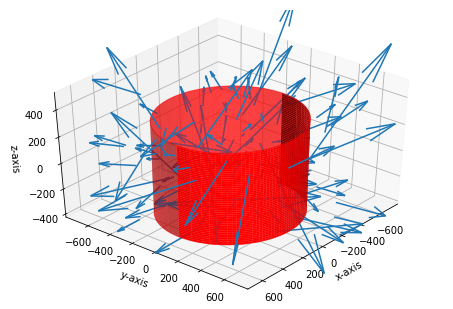

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

def plot_3D_cylinder(radius, height, elevation=0, resolution=100, color='r', x_center = 0, y_center = 0):
    fig=plt.figure()
    ax = Axes3D(fig, azim=40, elev=40)

    x = np.linspace(x_center-radius, x_center+radius, resolution)
    z = np.linspace(elevation, elevation+height, resolution)
    X, Z = np.meshgrid(x, z)

    Y = np.sqrt(radius**2 - (X - x_center)**2) + y_center # Pythagorean theorem

    ax.plot_surface(X, Y, Z, linewidth=0, color=color)
    ax.plot_surface(X, (2*y_center-Y), Z, linewidth=0, color=color, alpha=0.5)

    floor = Circle((x_center, y_center), radius, color=color, alpha=0.5)
    ax.add_patch(floor)
    art3d.pathpatch_2d_to_3d(floor, z=elevation, zdir="z")

    ceiling = Circle((x_center, y_center), radius, color=color, alpha=0.5)
    ax.add_patch(ceiling)
    art3d.pathpatch_2d_to_3d(ceiling, z=elevation+height, zdir="z")

    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_zlabel('z-axis')
    for i in range(100):
    
        ax.quiver(mc_pos_x[i], mc_pos_y[i], mc_pos_z[i], end_x[i], end_y[i], end_z[i], length=mc_len[i]/500, 
                  pivot='tail')
    plt.show()

# params
radius = 508.68
height = 706.21
elevation = -405.93
resolution = 100
color = 'r'
x_center =0
y_center = 0

plot_3D_cylinder(radius, height, elevation=elevation, resolution=resolution, 
                 color=color, x_center=x_center, y_center=y_center)

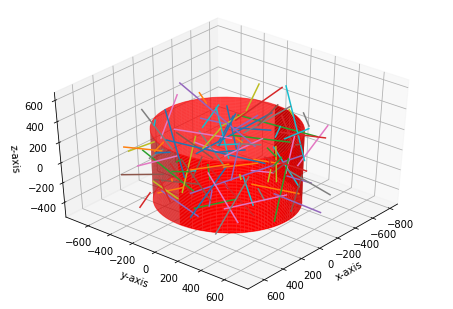

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

def plot_3D_cylinder(radius, height, elevation=0, resolution=100, color='r', x_center = 0, y_center = 0):
    fig=plt.figure()
    ax = Axes3D(fig, azim=40, elev=40)

    x = np.linspace(x_center-radius, x_center+radius, resolution)
    z = np.linspace(elevation, elevation+height, resolution)
    X, Z = np.meshgrid(x, z)

    Y = np.sqrt(radius**2 - (X - x_center)**2) + y_center # Pythagorean theorem

    ax.plot_surface(X, Y, Z, linewidth=0, color=color)
    ax.plot_surface(X, (2*y_center-Y), Z, linewidth=0, color=color, alpha=0.5)

    floor = Circle((x_center, y_center), radius, color=color, alpha=0.5)
    ax.add_patch(floor)
    art3d.pathpatch_2d_to_3d(floor, z=elevation, zdir="z")

    ceiling = Circle((x_center, y_center), radius, color=color, alpha=0.5)
    ax.add_patch(ceiling)
    art3d.pathpatch_2d_to_3d(ceiling, z=elevation+height, zdir="z")

    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_zlabel('z-axis')
    for i in range(100):
    
        ax.plot([mc_pos_x[i], end_x[i]],[mc_pos_y[i], end_y[i]], zs=[mc_pos_z[i], end_z[i]])
    plt.show()

# params
radius = 508.68
height = 706.21
elevation = -405.93
resolution = 100
color = 'r'
x_center =0
y_center = 0

plot_3D_cylinder(radius, height, elevation=elevation, resolution=resolution, 
                 color=color, x_center=x_center, y_center=y_center)

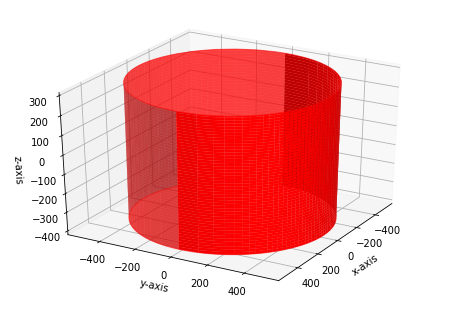

In [20]:
### import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure(figsize=(20,20))
#ax = Axes3D(fig)
for i in range(100):
        ax.plot([mc_pos_x[i], end_x[i]],[mc_pos_y[i], end_y[i]], zs=[mc_pos_z[i], end_z[i]])
ax.set_xlim(-1000, 1000)
ax.set_ylim(-1500, 1000)
ax.set_zlim(-1500, 1500)
#plot_3D_cylinder(radius, height, elevation=elevation, resolution=resolution, color=color, x_center=x_center, y_center=y_center)
plt.show()

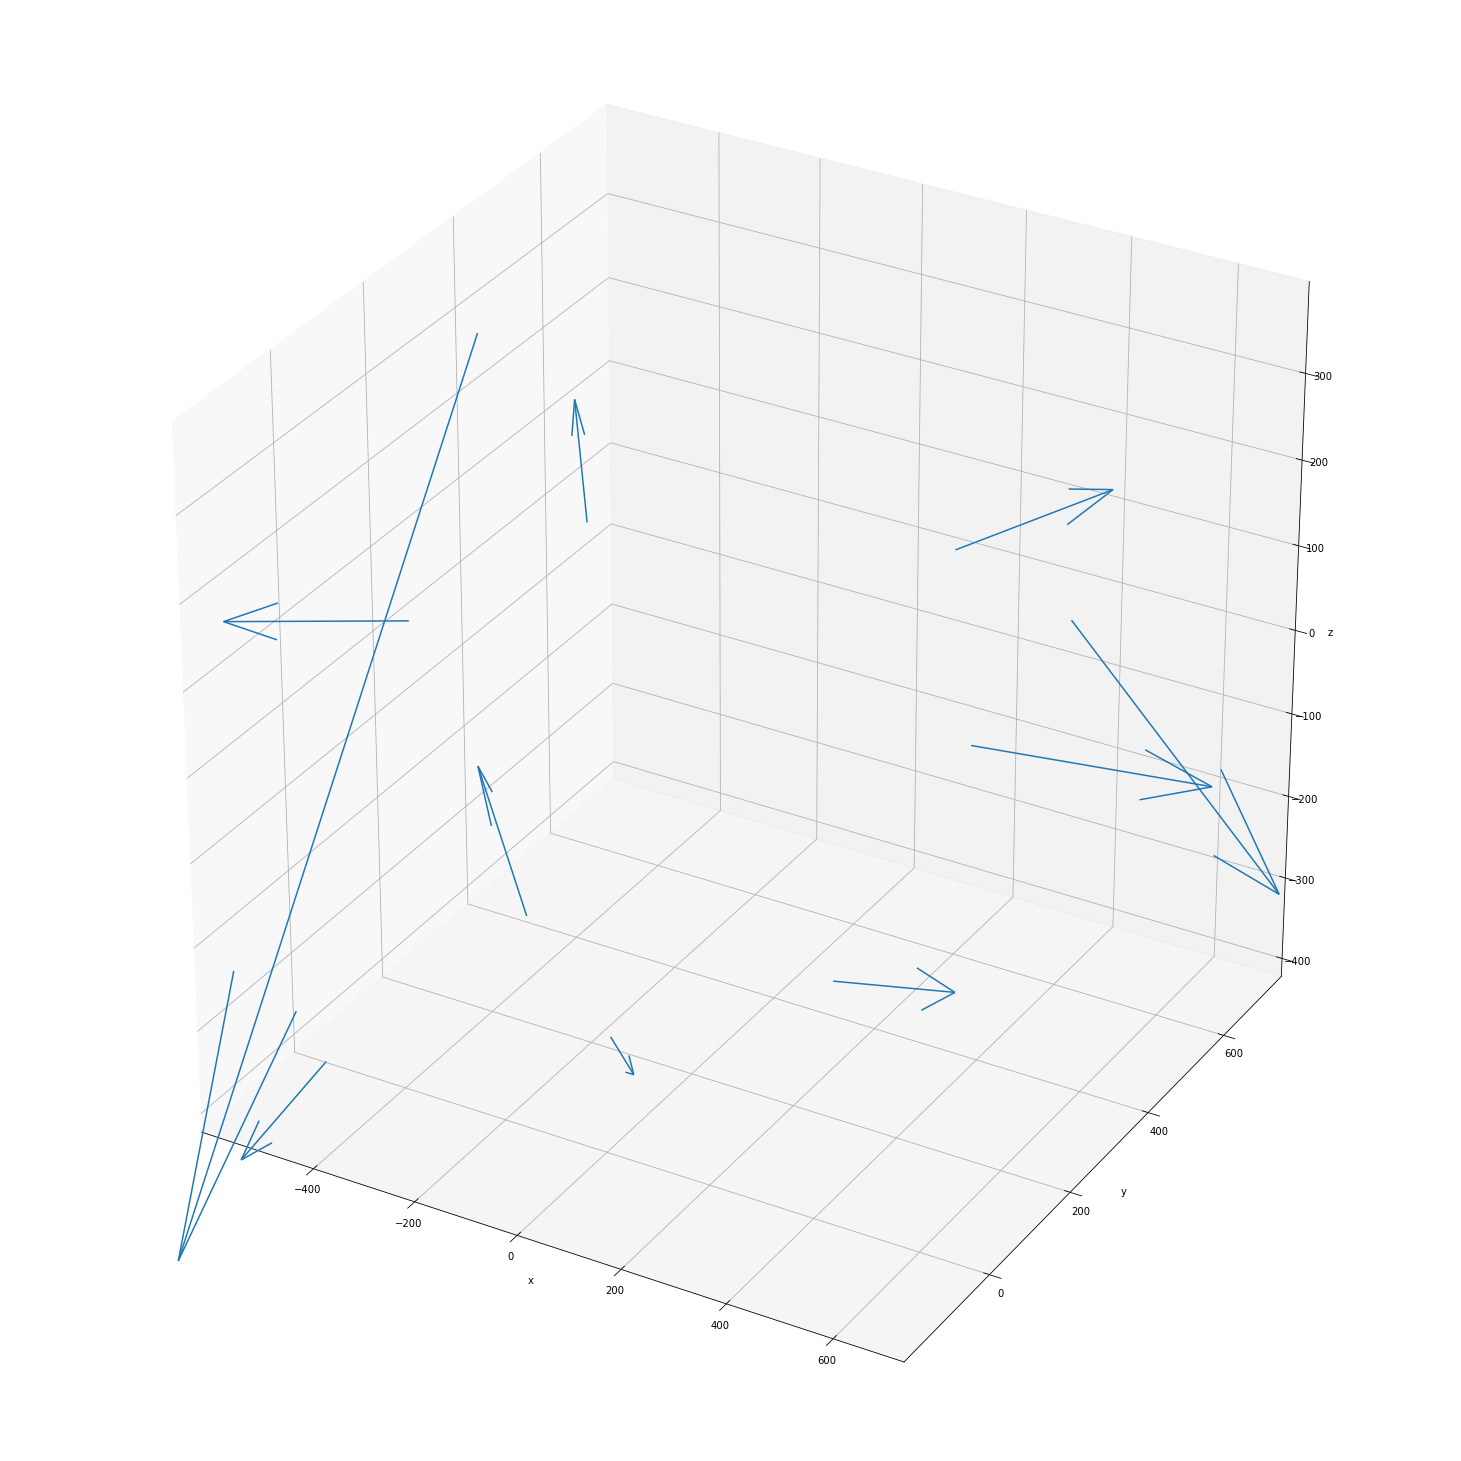

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,20))
ax = Axes3D(fig)
for i in range(10):
    #ax.quiver(vector[0],vector[1],vector[2],vector[3],vector[4],vector[5],pivot='tail',length=vlength,arrow_length_ratio=0.3/vlength)
    ax.quiver(mc_pos_x[i], mc_pos_y[i], mc_pos_z[i], end_x[i], end_y[i], end_z[i], length=mc_len[i]/500, 
                  pivot='tail')
    #Axes3D.plot(ax,[mc_pos_x[i], end_x[i]],[mc_pos_y[i], end_y[i]], zs=[mc_pos_z[i], end_z[i]], color='r')
#ax.set_xlim(-1000, 1000)
#ax.set_ylim(-800, 800)
#ax.set_zlim(-10000, 10000)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


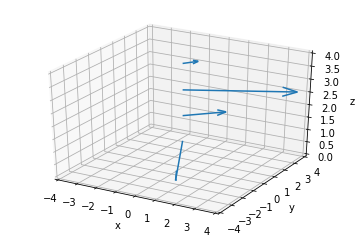

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

vectors=np.array( [ [0,0,1,1,-2,0], [0,0,2,1,1,0],[0,0,3,2,1,0],[0,0,4,0.5,0.7,0]]) 
#tracks = np.array[mc_pos_x, mc_pos_y, mc_pos_z, end_x, end_y, end_z]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for vector in vectors:
    v = np.array([vector[3],vector[4],vector[5]])
    vlength=np.linalg.norm(v)
    ax.quiver(vector[0],vector[1],vector[2],vector[3],vector[4],vector[5],
            pivot='tail',length=vlength,arrow_length_ratio=0.3/vlength)
ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
ax.set_zlim([0,4])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

(3, 1, 9)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,20))
ax = Axes3D(fig)
for j in range(2000):
    for i in range(mc_pos_x[j].size):
        Axes3D.scatter3D(ax,[mc_pos_x[j][i]],[mc_pos_y[j][i]],zs=[mc_pos_z[j][i]])
ax.set_xlim(-1000, 1000)
ax.set_ylim(-1500, 1000)
ax.set_zlim(-800, 800)
plt.show()

In [ ]:
plt.show()Axes3D.plot

In [ ]:
import plotly 
plotly.tools.set_credentials_file(username='cdesio', api_key='3qloyzUX4MhVJjyX1fUT')



In [4]:
import plotly
plotly.offline.init_notebook_mode()

In [14]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

trace1 = go.Scatter3d(
    x=np.hstack(mc_pos_x),
    y=np.hstack(mc_pos_y),
    z=np.hstack(mc_pos_z),
    mode='markers',
    marker=dict(
        size=6,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=1
        ),
        opacity=0
    )
)

trace2 = go.Scatter3d(
    x=np.hstack(end_x),
    y=np.hstack(end_y),
    z=np.hstack(end_z),
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=4,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace1, trace2]
#data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:318: SNIMissingWarning:

An HTTPS request has been made, but the SNI (Subject Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/security.html#snimissingwarning.

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:122: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/security.html#insecureplatformwarning.



In [104]:
np.hstack(mc_pos_x[0])*leng[0]

array([-122864.053617, -122864.053617, -122864.053617, -122864.053617,
       -122864.053617, -122864.053617, -122864.053617, -122864.053617,
       -122864.053617, -122864.053617, -122864.053617, -122864.053617,
       -122864.053617, -122864.053617, -122864.053617, -122864.053617,
       -122864.053617, -122793.524712, -122725.997037, -122810.631723,
       -122909.37219 , -122731.999497, -122701.386951, -122804.32914 ,
       -122805.829755, -122779.118808, -122827.138488, -122891.965056,
       -122864.053617, -122864.053617, -122791.723974, -122804.029017,
       -122859.551772])

In [103]:
leng[0]

300.12299999999999

In [31]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

N = 50
trace1 = go.Mesh3d(x=(30*np.random.randn(N)),
                   y=(25*np.random.randn(N)),
                   z=(30*np.random.randn(N)),
                   opacity=0.5,)


layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="rgb(255, 255, 255)",
                         showbackground=True,
                         zerolinecolor="rgb(255, 255, 255)",),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="rgb(255, 255, 255)",
                        showbackground=True,
                        zerolinecolor="rgb(255, 255, 255)"),
                    zaxis = dict(
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="rgb(255, 255, 255)",
                        showbackground=True,
                        zerolinecolor="rgb(255, 255, 255)",),),
                    width=700,
                    margin=dict(
                    r=10, l=10,
                    b=10, t=10)
                  )
fig = go.Figure(data=[trace1], layout=layout)
py.iplot(fig)

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:122: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/security.html#insecureplatformwarning.



In [42]:
# params
radius = 508.68
height = 706.21
elevation = -405.93
resolution = 100
color = 'r'
x_center =0
y_center = 0

X, Z = np.meshgrid(x, z)

trace1 = go.Mesh3d(x = np.linspace(x_center-radius, x_center+radius, resolution),
                   z = np.linspace(elevation, elevation+height, resolution),
                   y = np.sqrt(radius**2 - (X - x_center)**2) + y_center,
                   opacity=0.5,)
				   
layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="rgb(255, 255, 255)",
                         showbackground=True,
                         zerolinecolor="rgb(255, 255, 255)",),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="rgb(255, 255, 255)",
                        showbackground=True,
                        zerolinecolor="rgb(255, 255, 255)"),
                    zaxis = dict(
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="rgb(255, 255, 255)",
                        showbackground=True,
                        zerolinecolor="rgb(255, 255, 255)",),),
                    width=700,
                    margin=dict(
                    r=10, l=10,
                    b=10, t=10)
                  )
fig = go.Figure(data=[trace1], layout=layout)
py.iplot(fig)


/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:122: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/security.html#insecureplatformwarning.

